In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [15]:
data = pd.read_csv('dataset_insurance2.csv')
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
data.shape

(1338, 7)

In [17]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
data['sex'] = data['sex'].astype('category')
#data['children'] = data['children'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [55]:
def outlier(df):
    list_outlier_col = ['bmi','charges'] #colonnes concernées
    for i in list_outlier_col :
        #limite superieure
        upper_limit = df[i].quantile(0.85)
        #limite inferieure
        lower_limit = df[i].quantile(0.15)
        df[i] = df[i].clip(lower = lower_limit, upper =  upper_limit)
    return df

In [56]:
data = outlier(data)

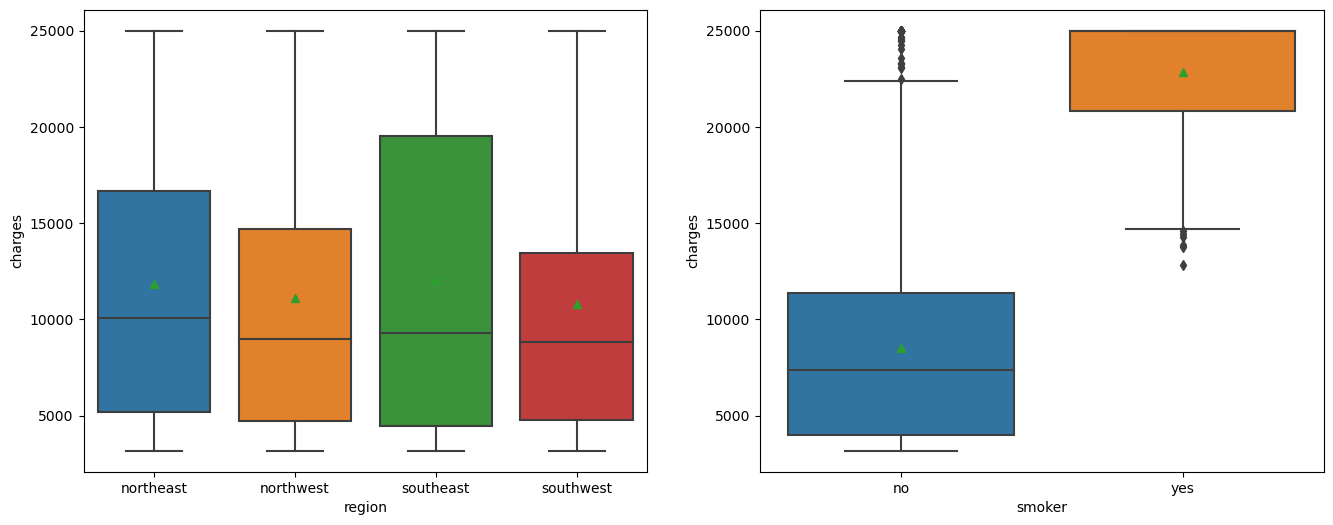

In [57]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["region"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["smoker"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

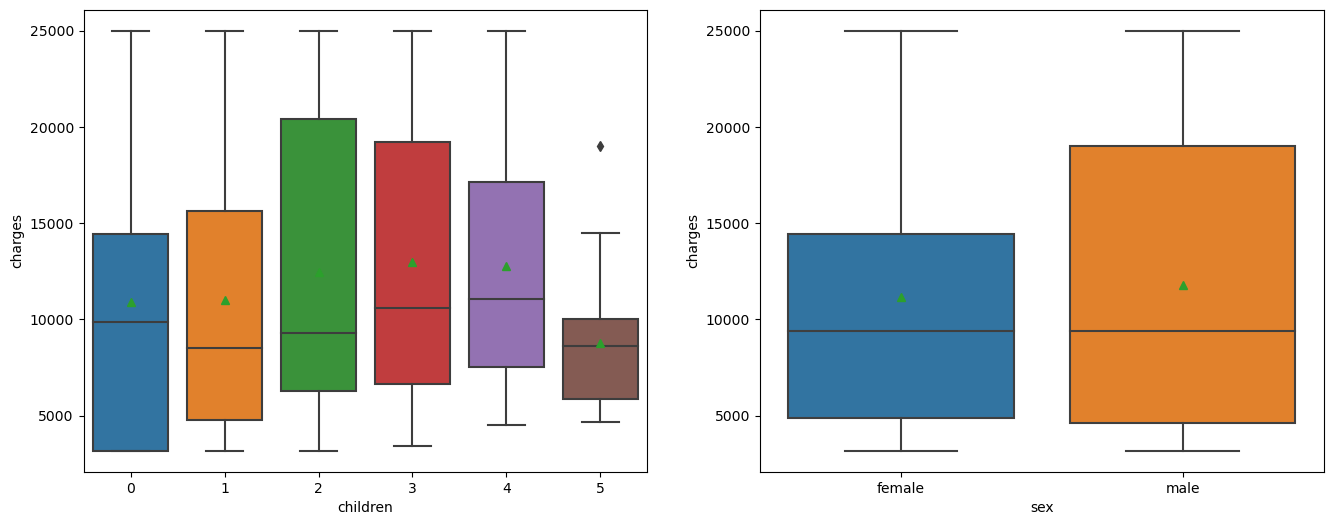

In [58]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["children"], y = data["charges"], data= data, ax=axes[0], showmeans=True);
sns.boxplot(x= data["sex"], y = data["charges"], data= data, ax=axes[1], showmeans=True);

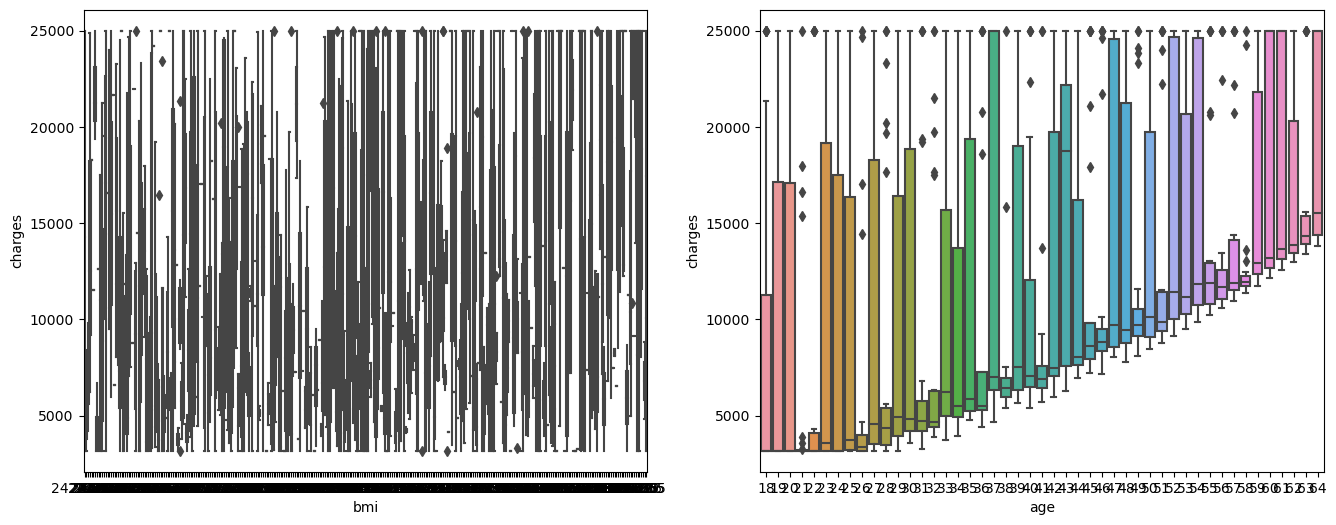

In [59]:
# Gestion des valeurs aberrantes
fig, axes = plt.subplots(1, 2, figsize=(16,6))
plt.ticklabel_format(style='plain', axis='y')

sns.boxplot(x= data["bmi"], y = data["charges"], data= data, ax=axes[0]);
sns.boxplot(x= data["age"], y = data["charges"], data= data, ax=axes[1]);

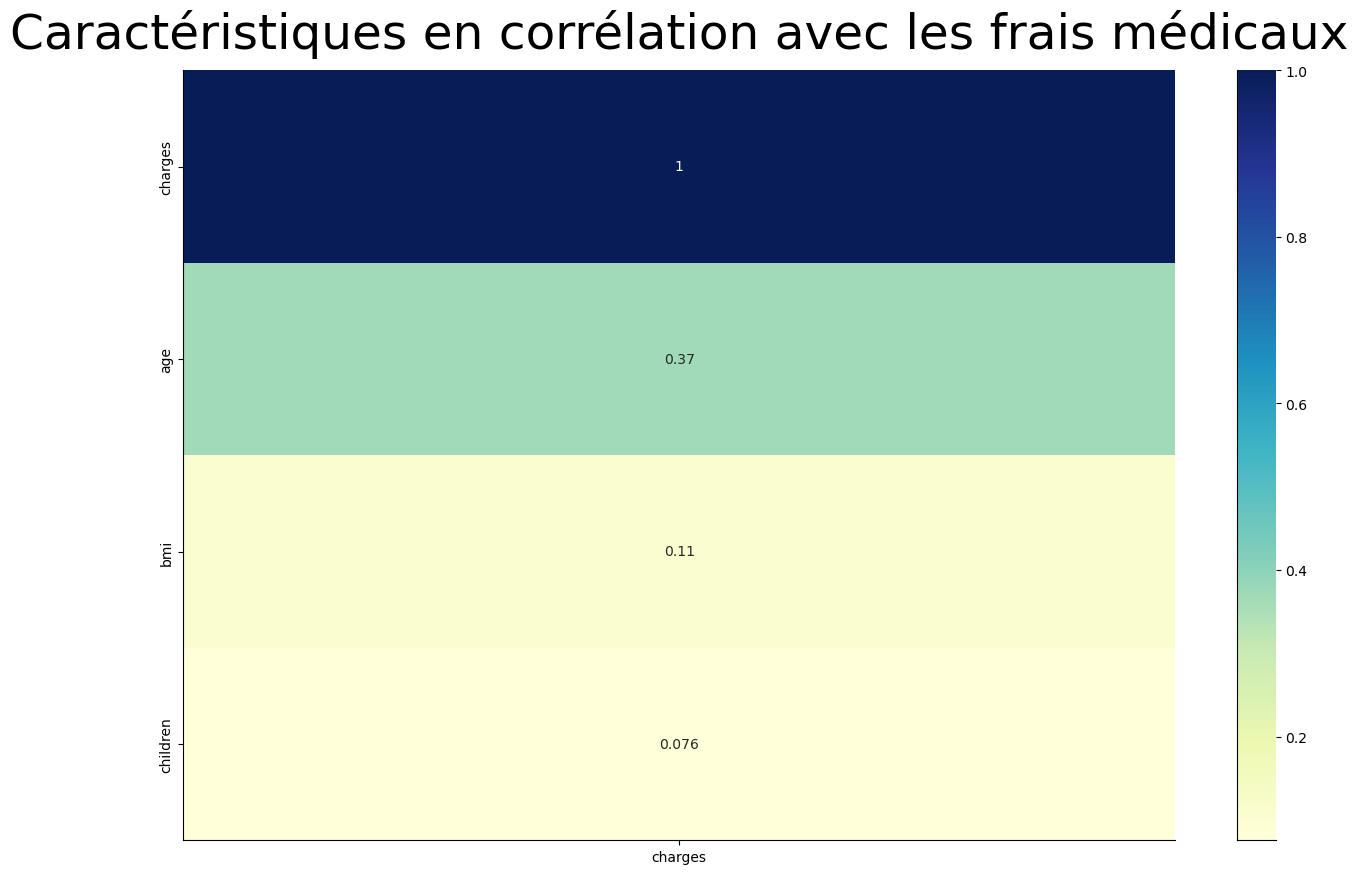

In [132]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(data.corr()[['charges']].sort_values(by='charges', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Caractéristiques en corrélation avec les frais médicaux', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

In [135]:
#Getting all the unique values in each feature
features = data.columns
for feature in features:
    print(f"{feature} ---> {data[feature].nunique()}")

age ---> 47
sex ---> 2
bmi ---> 319
children ---> 6
smoker ---> 2
region ---> 4
charges ---> 938


In [136]:
data[data.columns].nunique()

age          47
sex           2
bmi         319
children      6
smoker        2
region        4
charges     938
dtype: int64

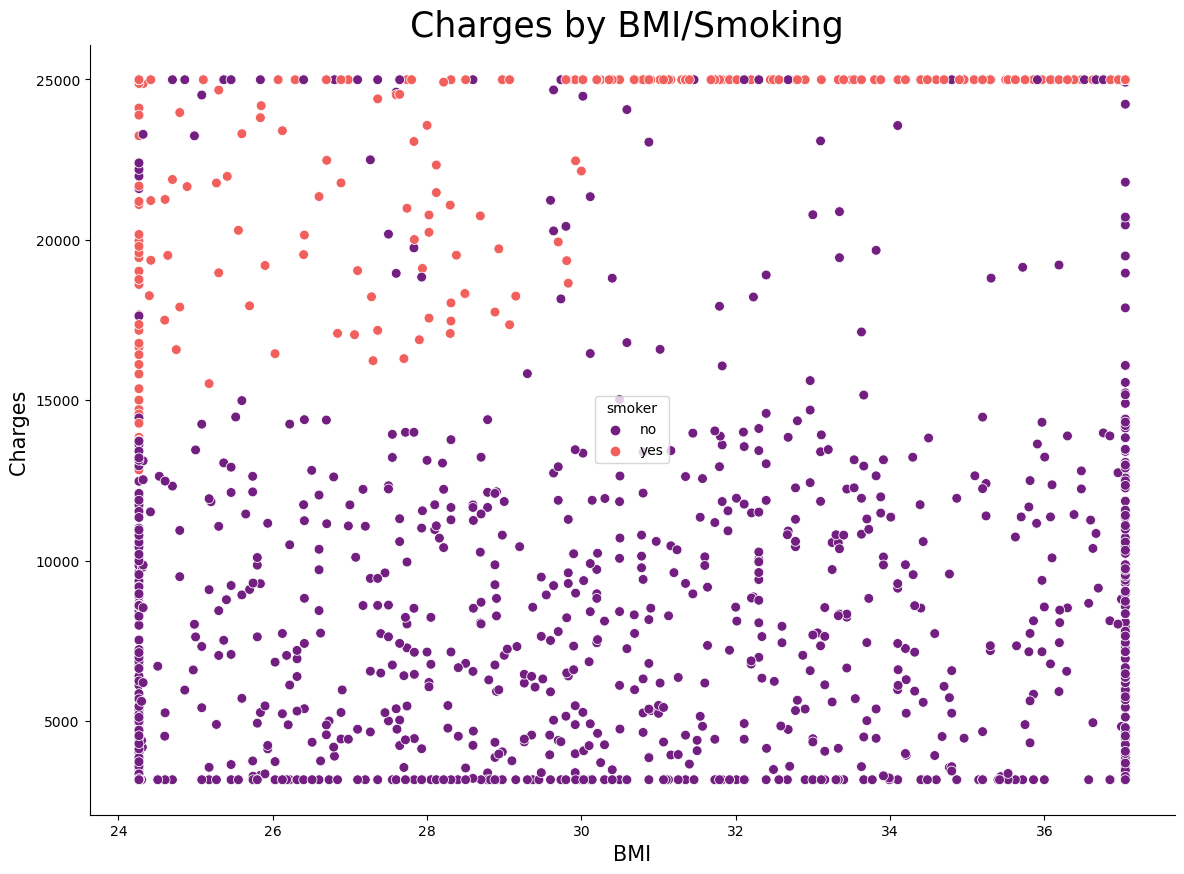

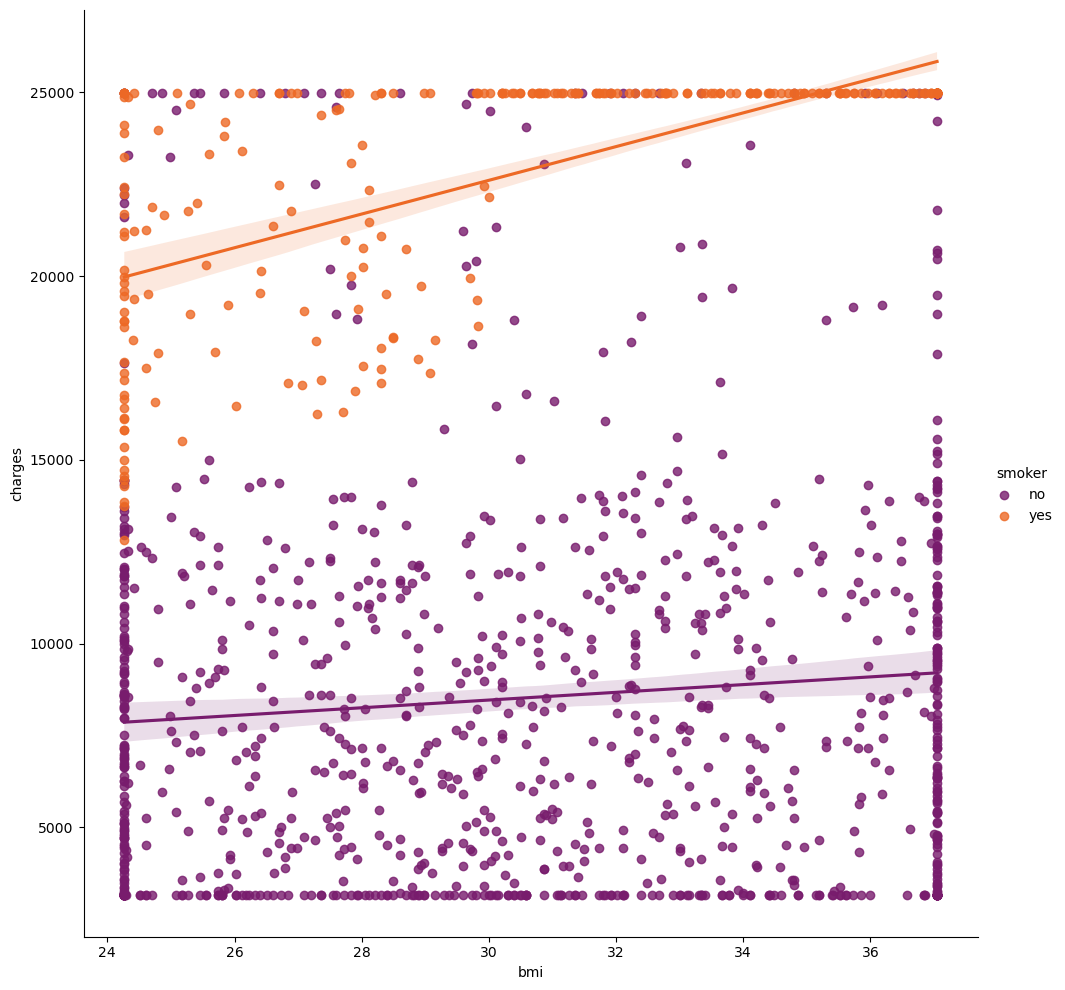

In [137]:
plt.figure(figsize=(14,10))
plt.title("Charges by BMI/Smoking ",fontsize = 25)
sns.scatterplot(data = data, y = 'charges', x = 'bmi', hue = 'smoker',
               palette = 'magma', s = 50)
plt.ylabel("Charges ", fontsize = 15)
plt.xlabel("BMI", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'inferno', size = 10)
plt.show()

In [149]:
data_with_get_dummies = data.copy()
data_with_ohe = data.copy()
data_with_get_dummies = pd.get_dummies(data_with_get_dummies, prefix=None, prefix_sep='_', dummy_na=False, columns=['age','smoker','children'], sparse=False, drop_first=False, dtype=None)

In [150]:
data_with_get_dummies.head()

,sex,region,charges,bmi,age_18,age_19,age_20,age_21,age_22,age_23,...,age_63,age_64,smoker_no,smoker_yes,children_0,children_1,children_2,children_3,children_4,children_5
0,female,southwest,16884.924000,27.90000,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,male,southeast,3171.836605,33.77000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,male,southeast,4449.462000,33.00000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,male,northwest,21984.470610,24.26625,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,male,northwest,3866.855200,28.88000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [143]:
data_with_get_dummies = data_with_get_dummies[[c for c in data_with_get_dummies if c not in ['bmi']] 
       + ['bmi']]

In [151]:
data_with_get_dummies.head()

,sex,region,charges,bmi,age_18,age_19,age_20,age_21,age_22,age_23,...,age_63,age_64,smoker_no,smoker_yes,children_0,children_1,children_2,children_3,children_4,children_5
0,female,southwest,16884.924000,27.90000,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,male,southeast,3171.836605,33.77000,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,male,southeast,4449.462000,33.00000,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,male,northwest,21984.470610,24.26625,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,male,northwest,3866.855200,28.88000,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [152]:
X2=data_with_get_dummies.iloc[:,3:].values
y2 = data_with_get_dummies.iloc[:,2].values

In [153]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 1)

In [154]:
regr = linear_model.LinearRegression()

regr.fit(X2_train , y2_train)

LinearRegression()

In [155]:
y_pred = regr.predict(X2_test)
print('R2_score: ', r2_score(y2_test, y_pred))
print('MAE : ',mean_absolute_error(y2_test, y_pred))
print('MSE : ',mean_squared_error(y2_test, y_pred))

R2_score:  0.7507533607583786
MAE :  2352.057841617538
MSE :  14092004.309814824


In [ ]:
numeric_features = ['age', 'bmi']
numeric_transformer = Pipeline(steps=[('poly',PolynomialFeatures(degree =3)),
('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, ['sex', 'smoker'])])